By Sakshi Verma

Importing the dataset

In [ ]:
import pandas as pd

# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('reviews.txt', sep='\t')
data.head()

,Unnamed: 0,review
0,1,"Absolutely love the value with their ""buy at l..."
1,2,Ordered food from Domino's on North 25th stree...
2,3,Ordered a veggie lover's pizza without onion f...
3,4,Just another good experience with the Domino's...
4,5,"Review for Dominos del Amo bl, Lakewood CA. Ve..."


In [ ]:
#Dropping the unwanted columns
# Dropping Unnamed: 0 column
mydata = data.drop('Unnamed: 0', axis=1)
mydata.head()


,review
0,"Absolutely love the value with their ""buy at l..."
1,Ordered food from Domino's on North 25th stree...
2,Ordered a veggie lover's pizza without onion f...
3,Just another good experience with the Domino's...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve..."


Step 1 : Cleaning the text

In [ ]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['review'].apply(clean)
mydata.head()

,review,Cleaned Reviews
0,"Absolutely love the value with their ""buy at l...",Absolutely love the value with their buy at le...
1,Ordered food from Domino's on North 25th stree...,Ordered food from Domino s on North th street ...
2,Ordered a veggie lover's pizza without onion f...,Ordered a veggie lover s pizza without onion f...
3,Just another good experience with the Domino's...,Just another good experience with the Domino s...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...


* Step 2 Tokenization
* Step 3 POS tagging
* Step 4 stopwords removal

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,Cleaned Reviews,POS tagged
0,"Absolutely love the value with their ""buy at l...",Absolutely love the value with their buy at le...,"[(Absolutely, r), (love, None), (value, n), (b..."
1,Ordered food from Domino's on North 25th stree...,Ordered food from Domino s on North th street ...,"[(Ordered, v), (food, n), (Domino, n), (North,..."
2,Ordered a veggie lover's pizza without onion f...,Ordered a veggie lover s pizza without onion f...,"[(Ordered, v), (veggie, n), (lover, n), (pizza..."
3,Just another good experience with the Domino's...,Just another good experience with the Domino s...,"[(another, None), (good, a), (experience, n), ..."
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...,"[(Review, n), (Dominos, n), (del, None), (Amo,..."


Step 5 Obtaining the stem words

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,review,Cleaned Reviews,POS tagged,Lemma
0,"Absolutely love the value with their ""buy at l...",Absolutely love the value with their buy at le...,"[(Absolutely, r), (love, None), (value, n), (b...",Absolutely love value buy least two deal go ...
1,Ordered food from Domino's on North 25th stree...,Ordered food from Domino s on North th street ...,"[(Ordered, v), (food, n), (Domino, n), (North,...",Ordered food Domino North th street Derick t...
2,Ordered a veggie lover's pizza without onion f...,Ordered a veggie lover s pizza without onion f...,"[(Ordered, v), (veggie, n), (lover, n), (pizza...",Ordered veggie lover pizza without onion loc...
3,Just another good experience with the Domino's...,Just another good experience with the Domino s...,"[(another, None), (good, a), (experience, n), ...",another good experience Domino Pizza store K...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...,"[(Review, n), (Dominos, n), (del, None), (Amo,...",Review Dominos del Amo bl Lakewood CA highly...


In [ ]:
mydata[['review', 'Lemma']]

,review,Lemma
0,"Absolutely love the value with their ""buy at l...",Absolutely love value buy least two deal go ...
1,Ordered food from Domino's on North 25th stree...,Ordered food Domino North th street Derick t...
2,Ordered a veggie lover's pizza without onion f...,Ordered veggie lover pizza without onion loc...
3,Just another good experience with the Domino's...,another good experience Domino Pizza store K...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...
...,...,...
125,I recently found out that Domino's has been se...,recently find Domino sell everyone personal ...
126,"I have noticed that when I order online, more ...",notice order online item normally include le...
127,Domino's Pizza Domino's Pizza Pittsburgh Penns...,Domino Pizza Domino Pizza Pittsburgh Pennsyl...
128,Love the parmesan garlic sauce! Please do more...,Love parmesan garlic sauce Please Noid comme...


Sentiment analysis using TextBlob

In [ ]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(mydata[['review', 'Lemma']])

fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis
0,"Absolutely love the value with their ""buy at l...",Absolutely love value buy least two deal go ...,0.388889,Positive
1,Ordered food from Domino's on North 25th stree...,Ordered food Domino North th street Derick t...,0.316667,Positive
2,Ordered a veggie lover's pizza without onion f...,Ordered veggie lover pizza without onion loc...,0.146627,Positive
3,Just another good experience with the Domino's...,another good experience Domino Pizza store K...,0.233333,Positive
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...,0.373500,Positive


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Negative    64
Positive    58
Neutral      8
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5ba242e8d0>,
 [Text(0.02658011817575533, 1.0996788155264987, 'Negative'),
  Text(-0.23736260252046337, -1.0740851897892982, 'Positive'),
  Text(1.3248496763125257, -0.2593710376557031, 'Neutral')],
 [Text(0.014498246277684724, 0.5998248084689992, '49.2%'),
  Text(-0.1294705104657073, -0.5858646489759808, '44.6%'),
  Text(0.8341646110115901, -0.16330769037581302, '6.2%')])

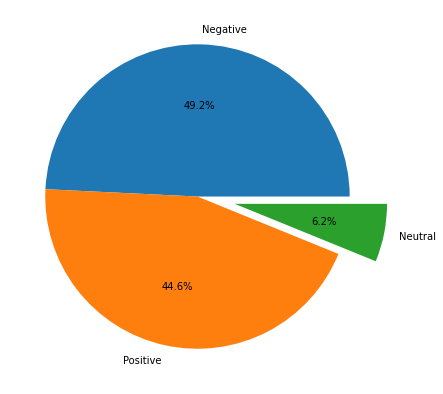

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


Sentiment analysis using VADER

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,"Absolutely love the value with their ""buy at l...",Absolutely love value buy least two deal go ...,0.388889,Positive,0.9669,Positive
1,Ordered food from Domino's on North 25th stree...,Ordered food Domino North th street Derick t...,0.316667,Positive,0.8555,Positive
2,Ordered a veggie lover's pizza without onion f...,Ordered veggie lover pizza without onion loc...,0.146627,Positive,0.8658,Positive
3,Just another good experience with the Domino's...,another good experience Domino Pizza store K...,0.233333,Positive,0.9371,Positive
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...,0.373500,Positive,0.9897,Positive


In [ ]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     53
Positive    40
Negative    37
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5ba259c250>,
 [Text(0.34313479420256143, 1.149895000862064, 'Neutral'),
  Text(-1.0187920845765916, -0.4148043977636727, 'Positive'),
  Text(0.6888038432985739, -0.8576416882691243, 'Negative')],
 [Text(0.20016196328482747, 0.6707720838362039, '40.8%'),
  Text(-0.5557047734054136, -0.22625694423473056, '30.8%'),
  Text(0.37571118725376756, -0.46780455723770414, '28.5%')])

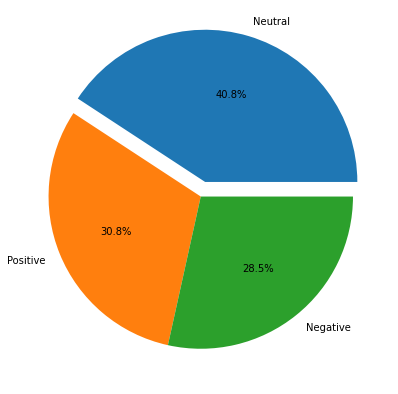

In [ ]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)


Sentiment Analysis using SentiWordNet

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,"Absolutely love the value with their ""buy at l...",Absolutely love value buy least two deal go ...,0.388889,Positive,0.9669,Positive,Positive
1,Ordered food from Domino's on North 25th stree...,Ordered food Domino North th street Derick t...,0.316667,Positive,0.8555,Positive,Positive
2,Ordered a veggie lover's pizza without onion f...,Ordered veggie lover pizza without onion loc...,0.146627,Positive,0.8658,Positive,Positive
3,Just another good experience with the Domino's...,another good experience Domino Pizza store K...,0.233333,Positive,0.9371,Positive,Positive
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...,0.373500,Positive,0.9897,Positive,Positive


In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Negative    65
Positive    57
Neutral      8
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5b9e225410>,
 [Text(7.34788079488412e-17, 1.2000000000000002, 'Negative'),
  Text(-0.21133937664960245, -1.0795071411886805, 'Positive'),
  Text(1.079507143662058, -0.21133936401575806, 'Neutral')],
 [Text(4.286263797015736e-17, 0.7, '50.0%'),
  Text(-0.11527602362705587, -0.5888220770120075, '43.8%'),
  Text(0.5888220783611224, -0.11527601673586801, '6.2%')])

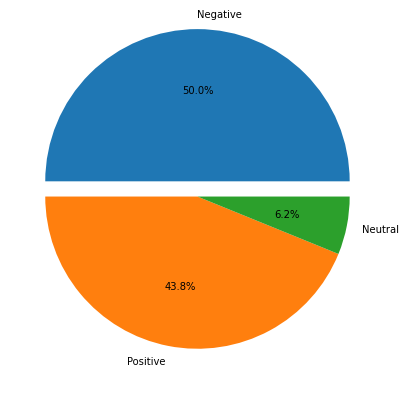

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)


Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x7f5b9e11c410>,
 [Text(6.735557395310444e-17, 1.1, 'Negative'),
  Text(-0.21133937664960245, -1.0795071411886805, 'Positive'),
  Text(1.3248496763125257, -0.2593710376557031, 'Neutral')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-0.11527602362705587, -0.5888220770120075, '43.8%'),
  Text(0.8341646110115901, -0.16330769037581302, '6.2%')])

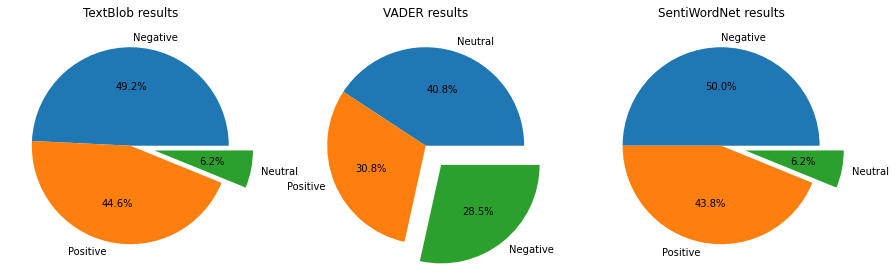

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)